In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [2]:
def perceptron(X, y, w_init=None, eta=0.1, epochs=1000):
    """
    Perceptron learning algorithm.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    w : array-like, shape = [n_features + 1]
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """
    if w_init is None:
        w = np.zeros(X.shape[1])
    else:
        w = w_init

    errors = []
    weights = []
    for epoch in range(epochs):
        e = 0
        for i, x in enumerate(X):
            if (np.dot(x, w) * y[i]) <= 0:
                w = w + eta * x * y[i]
                e += 1
        errors.append(e)
        weights.append(list(w))
        if epoch % 10 == 0:
            print("epoch: ", epoch, "error: ", e)
        if e == 0:
            break
    print("epoch: ", epoch, "error: ", e)
    return weights, errors

In [3]:
def predict(x, w):
    """
    Predict the output of a linear classifier.

    Parameters
    ----------
    x : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    w : array-like, shape = [n_features + 1]
        Weights after fitting.

    Returns
    -------
    y : array-like, shape = [n_samples]
        Predicted output of the classifier for each sample.

    """
    return np.sign(np.dot(x, w))

In [4]:
def predictBatch(X, w):
    """
    Predict the output of a linear classifier.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    w : array-like, shape = [n_features + 1]
        Weights after fitting.

    Returns
    -------
    y : array-like, shape = [n_samples]
        Predicted output of the classifier for each sample.

    """
    return np.sign(np.dot(X, w))

In [5]:
def measureAccuracy(X, y, w):
    """
    Measure the accuracy of a linear classifier.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    w : array-like, shape = [n_features + 1]
        Weights after fitting.

    Returns
    -------
    acc : float
        Measure of accuracy.

    """
    y_pred = predictBatch(X, w)
    return np.mean(y_pred == y)

In [6]:
def testTrainSplit(X, y, test_size=0.2):
    """
    Split the dataset into a training and a test set.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    test_size : float
        Percentage of the dataset to be used as test set.

    Returns
    -------
    X_train : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    X_test : array-like, shape = [n_samples, n_features]
        Test vector, where n_samples in the number of samples and
        n_features is the number of features.
    y_train : array-like, shape = [n_samples]
        Target vector relative to X_train.
    y_test : array-like, shape = [n_samples]
        Target vector relative to X_test.

    """
    Ns = X.shape[0]
    Nt = int(Ns * test_size)
    idx = np.random.permutation(Ns)
    X_train = X[idx[Nt:], :]
    X_test = X[idx[:Nt], :]
    y_train = y[idx[Nt:]]
    y_test = y[idx[:Nt]]
    return X_train, X_test, y_train, y_test

In [7]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=1000)
y[y == 0] = -1

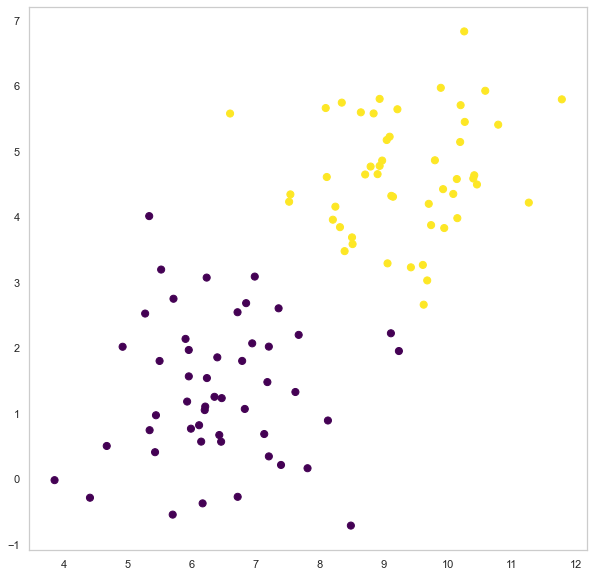

In [8]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


In [9]:
# lets augument the data
X = np.c_[X, np.ones(X.shape[0])]
X_train, X_test, y_train, y_test = testTrainSplit(X, y, test_size=0.5)



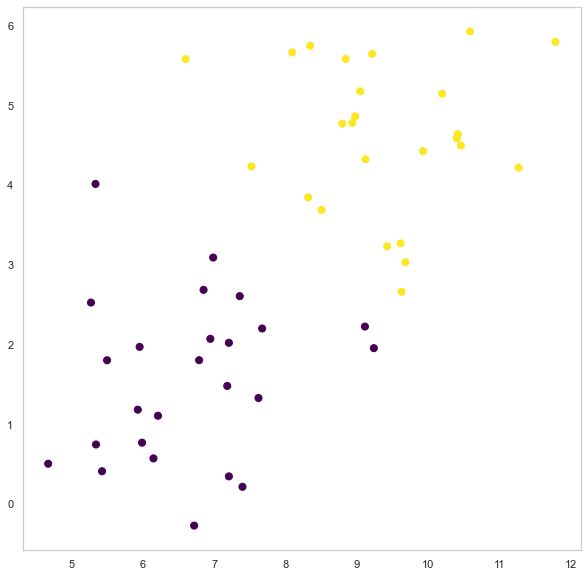

In [10]:
# plot train data
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis')
plt.show()

In [11]:
weights, errors = perceptron(X_train, y_train, epochs=100)

epoch:  0 error:  20
epoch:  10 error:  13
epoch:  20 error:  12
epoch:  30 error:  12
epoch:  40 error:  7
epoch:  50 error:  7
epoch:  60 error:  7
epoch:  70 error:  7
epoch:  80 error:  7
epoch:  90 error:  7
epoch:  99 error:  4


In [12]:
finalWeight = weights[-1]
accuracy = measureAccuracy(X_test, y_test, finalWeight)
print("Accuracy: ", accuracy)

Accuracy:  0.96


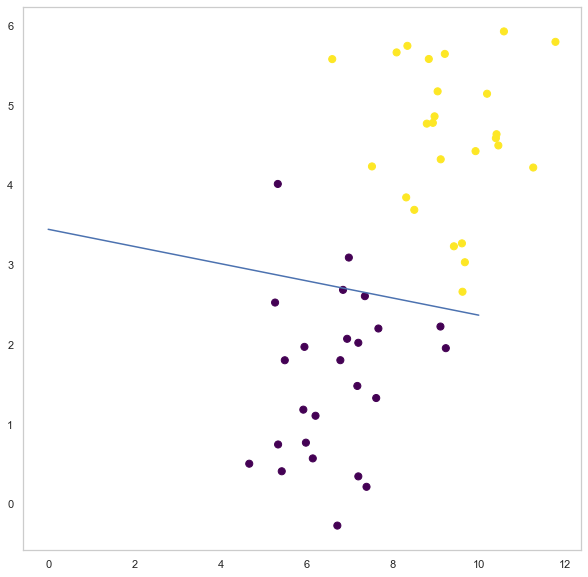

In [13]:
#plot the training data with boundary
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis')
w = finalWeight.copy()
x1 = np.linspace(0,10,2)
x2 = -(w[0] * x1 + w[2]) / w[1]
# trim the line to make it look nice
x2[x2 > 6] = 6
x2[x2 < 0] = 0
plt.plot(x1, x2)
plt.show()

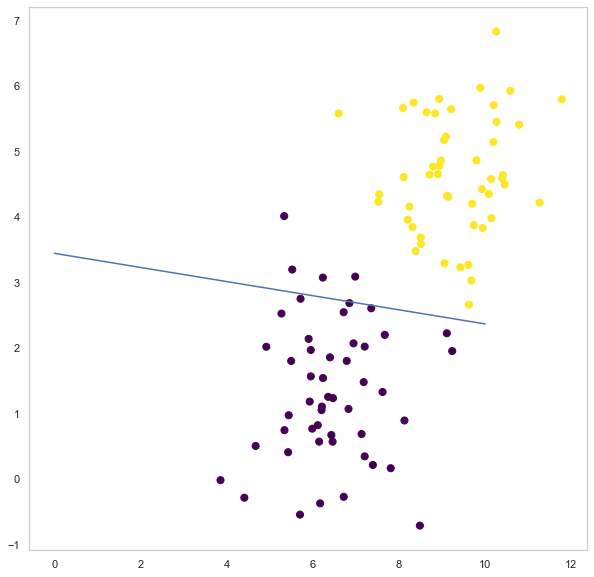

In [14]:
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
w = finalWeight.copy()
x1 = np.linspace(0,10,2)
x2 = -(w[0] * x1 + w[2]) / w[1]
# trim the line to make it look nice
x2[x2 > 6] = 6
x2[x2 < 0] = 0
plt.plot(x1, x2)
plt.show()
